In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv("C:\\Users\\hamsi\\Desktop\\raayek part\\Crop_recommendation_with_features.csv")

df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded,soil_fertility,moisture_index,ph_category,temp_category
0,1.209308,-0.374074,-0.120855,-0.913345,0.447125,0.083784,1.998992,rice,-1.647192,0.238126,0.008938,acidic,low
1,1.070389,0.095891,-0.158656,-0.742939,0.374050,0.774314,2.446469,rice,-1.647192,0.335875,0.009151,acidic,low
2,0.375789,0.007773,-0.101954,-0.506859,0.460933,1.809392,3.150297,rice,-1.647192,0.093869,0.014521,acidic,low
3,0.764765,-0.579684,-0.177557,0.160180,0.367047,0.699861,2.752242,rice,-1.647192,0.002508,0.010102,acidic,medium
4,0.875901,-0.374074,-0.139755,-1.056747,0.429851,1.536161,3.126774,rice,-1.647192,0.120690,0.013440,acidic,low


In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (2600, 12)
Target shape: (2600,)


In [20]:
df = pd.read_csv("C:\\Users\\hamsi\\Desktop\\raayek part\\Crop_recommendation_with_features.csv")  # Change path if needed

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded,soil_fertility,moisture_index,ph_category,temp_category
0,1.209308,-0.374074,-0.120855,-0.913345,0.447125,0.083784,1.998992,rice,-1.647192,0.238126,0.008938,acidic,low
1,1.070389,0.095891,-0.158656,-0.742939,0.374050,0.774314,2.446469,rice,-1.647192,0.335875,0.009151,acidic,low
2,0.375789,0.007773,-0.101954,-0.506859,0.460933,1.809392,3.150297,rice,-1.647192,0.093869,0.014521,acidic,low
3,0.764765,-0.579684,-0.177557,0.160180,0.367047,0.699861,2.752242,rice,-1.647192,0.002508,0.010102,acidic,medium
4,0.875901,-0.374074,-0.139755,-1.056747,0.429851,1.536161,3.126774,rice,-1.647192,0.120690,0.013440,acidic,low


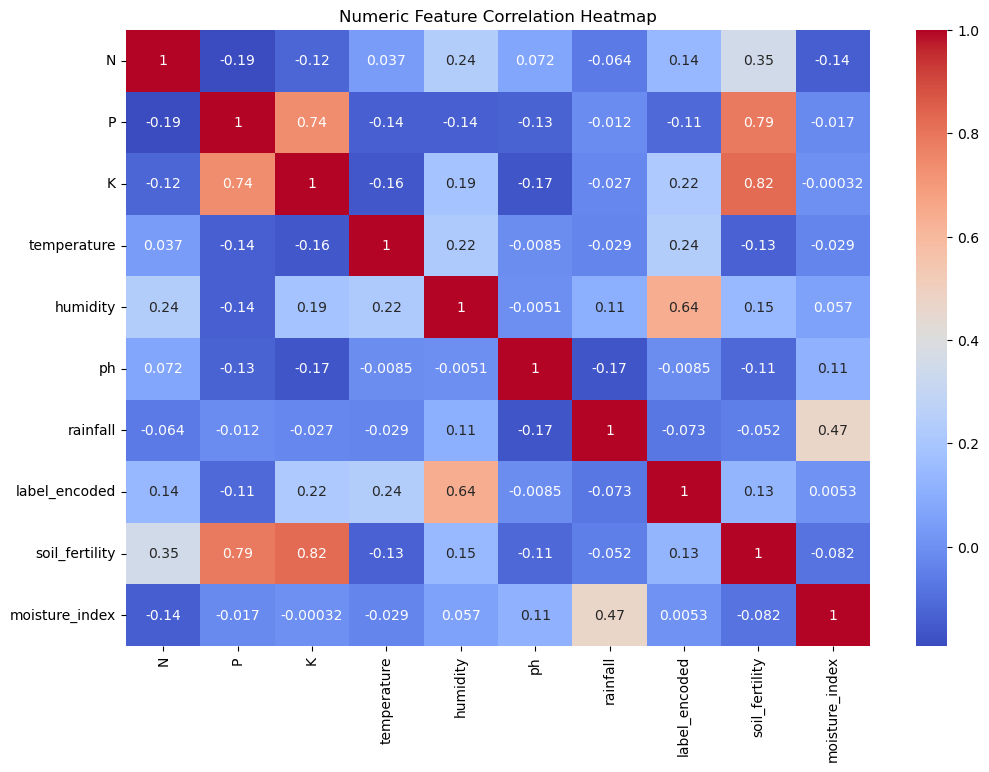

In [22]:
X_numeric = X.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(X_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation Heatmap")
plt.show()


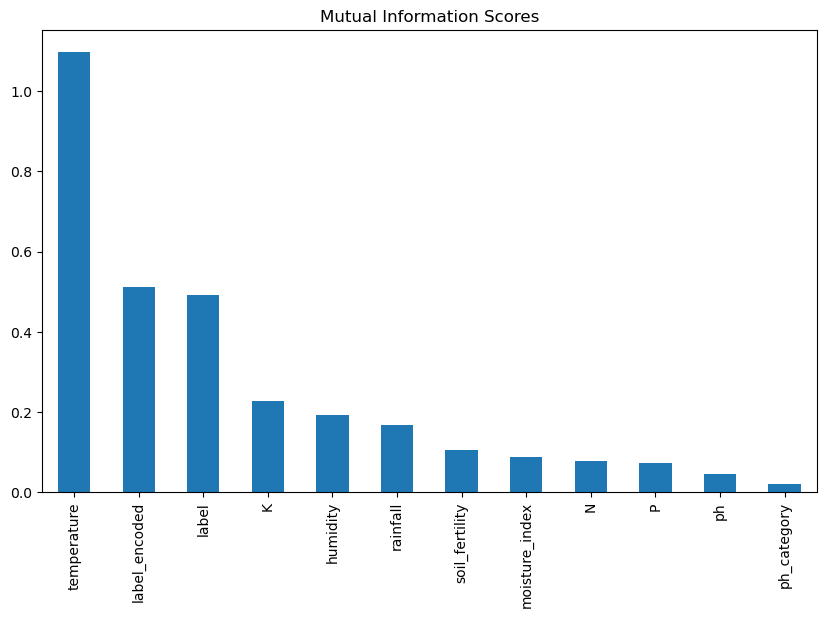

Top features based on Mutual Information: ['temperature', 'label_encoded', 'label', 'K', 'humidity']


In [21]:
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])
mi = mutual_info_classif(X_encoded, y)
mi_scores = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()

top_mi_features = mi_scores.head(5).index.tolist()
print("Top features based on Mutual Information:", top_mi_features)


In [14]:

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_encoded, y)


rfe_features = X_encoded.columns[rfe.support_].tolist()
print("Top features based on RFE:", rfe_features)


Top features based on RFE: ['P', 'K', 'temperature', 'humidity', 'rainfall']


In [23]:

selected_features = top_mi_features  # or rfe_features

X_selected = X_encoded[selected_features]
print("Shape of selected features dataset:", X_selected.shape)
X_selected.head()


Shape of selected features dataset: (2600, 5)


,temperature,label_encoded,label,K,humidity
0,-0.913345,-1.647192,18,-0.120855,0.447125
1,-0.742939,-1.647192,18,-0.158656,0.374050
2,-0.506859,-1.647192,18,-0.101954,0.460933
3,0.160180,-1.647192,18,-0.177557,0.367047
4,-1.056747,-1.647192,18,-0.139755,0.429851


In [17]:
save_path = "C:\\Users\\hamsi\\Desktop\\raayek part\\selected_features.csv"
X_selected.to_csv(save_path, index=False)
print(f"File saved successfully at: {save_path}")

File saved successfully at: C:\Users\hamsi\Desktop\raayek part\selected_features.csv
